In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import plotly.graph_objects as go
import missingno as msno
import seaborn as sns

## Lecture du Csv, et affichage des 10 premières lignes

In [2]:
csv_path = 'csv/FAO.csv'
df = pd.read_csv(csv_path, encoding='ISO-8859-1')
df.head(10)


,Area Abbreviation,Area Code,Area,Item Code,Item,Element Code,Element,Unit,latitude,longitude,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
0,AFG,2,Afghanistan,2511,Wheat and products,5142,Food,1000 tonnes,33.94,67.71,...,3249.0,3486.0,3704.0,4164.0,4252.0,4538.0,4605.0,4711.0,4810,4895
1,AFG,2,Afghanistan,2805,Rice (Milled Equivalent),5142,Food,1000 tonnes,33.94,67.71,...,419.0,445.0,546.0,455.0,490.0,415.0,442.0,476.0,425,422
2,AFG,2,Afghanistan,2513,Barley and products,5521,Feed,1000 tonnes,33.94,67.71,...,58.0,236.0,262.0,263.0,230.0,379.0,315.0,203.0,367,360
3,AFG,2,Afghanistan,2513,Barley and products,5142,Food,1000 tonnes,33.94,67.71,...,185.0,43.0,44.0,48.0,62.0,55.0,60.0,72.0,78,89
4,AFG,2,Afghanistan,2514,Maize and products,5521,Feed,1000 tonnes,33.94,67.71,...,120.0,208.0,233.0,249.0,247.0,195.0,178.0,191.0,200,200
5,AFG,2,Afghanistan,2514,Maize and products,5142,Food,1000 tonnes,33.94,67.71,...,231.0,67.0,82.0,67.0,69.0,71.0,82.0,73.0,77,76
6,AFG,2,Afghanistan,2517,Millet and products,5142,Food,1000 tonnes,33.94,67.71,...,15.0,21.0,11.0,19.0,21.0,18.0,14.0,14.0,14,12
7,AFG,2,Afghanistan,2520,"Cereals, Other",5142,Food,1000 tonnes,33.94,67.71,...,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0
8,AFG,2,Afghanistan,2531,Potatoes and products,5142,Food,1000 tonnes,33.94,67.71,...,276.0,294.0,294.0,260.0,242.0,250.0,192.0,169.0,196,230
9,AFG,2,Afghanistan,2536,Sugar cane,5521,Feed,1000 tonnes,33.94,67.71,...,50.0,29.0,61.0,65.0,54.0,114.0,83.0,83.0,69,81


## Informations du CSV:
- Valeurs manquantes / nulls,
- Valeurs présentes / non nulls,
- Valeurs présentes / total.

In [3]:
df.info()
isNull = df.isnull().sum()
for i in range(len(isNull)):
    if isNull[i] > 0:
        print(df.columns[i], isNull[i])
totalNotNull = df.notnull().sum().sum()
totalNull = df.isnull().sum().sum()
totalValue = totalNotNull + totalNull

print("\nTotal value: ", totalValue)
print("Total not null value: ", totalNotNull)
print("Total null value: ", totalNull)
print(f"Pourcentage de valeurs manquantes: {round(totalNull/totalValue*100, 2)}%")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21477 entries, 0 to 21476
Data columns (total 63 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area Abbreviation  21477 non-null  object 
 1   Area Code          21477 non-null  int64  
 2   Area               21477 non-null  object 
 3   Item Code          21477 non-null  int64  
 4   Item               21477 non-null  object 
 5   Element Code       21477 non-null  int64  
 6   Element            21477 non-null  object 
 7   Unit               21477 non-null  object 
 8   latitude           21477 non-null  float64
 9   longitude          21477 non-null  float64
 10  Y1961              17938 non-null  float64
 11  Y1962              17938 non-null  float64
 12  Y1963              17938 non-null  float64
 13  Y1964              17938 non-null  float64
 14  Y1965              17938 non-null  float64
 15  Y1966              17938 non-null  float64
 16  Y1967              179

C:\Users\m.geley\AppData\Local\Temp\ipykernel_21176\761288791.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if isNull[i] > 0:
C:\Users\m.geley\AppData\Local\Temp\ipykernel_21176\761288791.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(df.columns[i], isNull[i])


#### Total value:  1353051
#### Total not null value:  1235601
#### Total null value:  117450
#### Pourcentage de valeurs manquantes (avant nettoyage): 8.68%


## Nettoyage de la donnée

- Check des doublons

In [4]:
df.info()
duplicated_lines = df[df.duplicated()]
if not duplicated_lines.empty:
    df.drop_duplicates(inplace=True) #Supprime les doublons
else:
    print("Aucune ligne identique dans le dataframe.")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21477 entries, 0 to 21476
Data columns (total 63 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area Abbreviation  21477 non-null  object 
 1   Area Code          21477 non-null  int64  
 2   Area               21477 non-null  object 
 3   Item Code          21477 non-null  int64  
 4   Item               21477 non-null  object 
 5   Element Code       21477 non-null  int64  
 6   Element            21477 non-null  object 
 7   Unit               21477 non-null  object 
 8   latitude           21477 non-null  float64
 9   longitude          21477 non-null  float64
 10  Y1961              17938 non-null  float64
 11  Y1962              17938 non-null  float64
 12  Y1963              17938 non-null  float64
 13  Y1964              17938 non-null  float64
 14  Y1965              17938 non-null  float64
 15  Y1966              17938 non-null  float64
 16  Y1967              179

- Check des valeurs = 0

In [5]:
isNull = df.isnull().sum()
for i in range(len(isNull)):
    if isNull[i] > 0:
        print(df.columns[i], isNull[i])

Y1961 3539
Y1962 3539
Y1963 3539
Y1964 3539
Y1965 3539
Y1966 3539
Y1967 3539
Y1968 3539
Y1969 3539
Y1970 3539
Y1971 3539
Y1972 3539
Y1973 3539
Y1974 3539
Y1975 3539
Y1976 3539
Y1977 3539
Y1978 3539
Y1979 3539
Y1980 3539
Y1981 3539
Y1982 3539
Y1983 3539
Y1984 3539
Y1985 3539
Y1986 3539
Y1987 3539
Y1988 3539
Y1989 3539
Y1990 3415
Y1991 3415
Y1992 987
Y1993 612
Y1994 612
Y1995 612
Y1996 612
Y1997 612
Y1998 612
Y1999 612
Y2000 349
Y2001 349
Y2002 349
Y2003 349
Y2004 349
Y2005 349
Y2006 104
Y2007 104
Y2008 104
Y2009 104
Y2010 104
Y2011 104


C:\Users\m.geley\AppData\Local\Temp\ipykernel_21176\1952856712.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if isNull[i] > 0:
C:\Users\m.geley\AppData\Local\Temp\ipykernel_21176\1952856712.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(df.columns[i], isNull[i])


- Suppression des colonnes inutiles

In [6]:
df.drop(columns=['Area Code', 'Item Code', 'Element Code', 'Unit'], inplace=True)

- Conversion des types des 2 dernières colonnes

In [7]:
df['Y2012'] = df['Y2012'].astype('float64')
df['Y2013'] = df['Y2013'].astype('float64')

- Renommage des colonnes, retirer 'Y' pour toutes les colonnes

In [8]:
df.rename(columns=lambda x: x.replace('Y', ''), inplace=True)

- Sauvegarder les données néttoyées dans un nouveau csv

In [9]:
df.reset_index(drop=True, inplace=True)
df.to_csv('csv/FAO_cleaned.csv', index=False, encoding='iso-8859-1')

## Prévisualisation du dataframe nettoyé

In [10]:
clean_csv = './csv/FAO_cleaned.csv'
df = pd.read_csv(clean_csv, encoding='ISO-8859-1')
df.head(10)

,Area Abbreviation,Area,Item,Element,latitude,longitude,1961,1962,1963,1964,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,AFG,Afghanistan,Wheat and products,Food,33.94,67.71,1928.0,1904.0,1666.0,1950.0,...,3249.0,3486.0,3704.0,4164.0,4252.0,4538.0,4605.0,4711.0,4810.0,4895.0
1,AFG,Afghanistan,Rice (Milled Equivalent),Food,33.94,67.71,183.0,183.0,182.0,220.0,...,419.0,445.0,546.0,455.0,490.0,415.0,442.0,476.0,425.0,422.0
2,AFG,Afghanistan,Barley and products,Feed,33.94,67.71,76.0,76.0,76.0,76.0,...,58.0,236.0,262.0,263.0,230.0,379.0,315.0,203.0,367.0,360.0
3,AFG,Afghanistan,Barley and products,Food,33.94,67.71,237.0,237.0,237.0,238.0,...,185.0,43.0,44.0,48.0,62.0,55.0,60.0,72.0,78.0,89.0
4,AFG,Afghanistan,Maize and products,Feed,33.94,67.71,210.0,210.0,214.0,216.0,...,120.0,208.0,233.0,249.0,247.0,195.0,178.0,191.0,200.0,200.0
5,AFG,Afghanistan,Maize and products,Food,33.94,67.71,403.0,403.0,410.0,415.0,...,231.0,67.0,82.0,67.0,69.0,71.0,82.0,73.0,77.0,76.0
6,AFG,Afghanistan,Millet and products,Food,33.94,67.71,17.0,18.0,19.0,20.0,...,15.0,21.0,11.0,19.0,21.0,18.0,14.0,14.0,14.0,12.0
7,AFG,Afghanistan,"Cereals, Other",Food,33.94,67.71,0.0,0.0,0.0,0.0,...,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,AFG,Afghanistan,Potatoes and products,Food,33.94,67.71,111.0,97.0,103.0,110.0,...,276.0,294.0,294.0,260.0,242.0,250.0,192.0,169.0,196.0,230.0
9,AFG,Afghanistan,Sugar cane,Feed,33.94,67.71,45.0,45.0,45.0,45.0,...,50.0,29.0,61.0,65.0,54.0,114.0,83.0,83.0,69.0,81.0


### - Pourcentage total des données manquantes (après nettoyage)

In [11]:
isNull = df.isnull().sum()
totalNotNull = df.notnull().sum().sum()
totalNull = df.isnull().sum().sum()
totalValue = totalNotNull + totalNull
print(f"Pourcentage de valeurs manquantes: {round(totalNull/totalValue*100, 2)}%")

Pourcentage de valeurs manquantes: 9.27%


### - Informations générales:

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21477 entries, 0 to 21476
Data columns (total 59 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area Abbreviation  21477 non-null  object 
 1   Area               21477 non-null  object 
 2   Item               21477 non-null  object 
 3   Element            21477 non-null  object 
 4   latitude           21477 non-null  float64
 5   longitude          21477 non-null  float64
 6   1961               17938 non-null  float64
 7   1962               17938 non-null  float64
 8   1963               17938 non-null  float64
 9   1964               17938 non-null  float64
 10  1965               17938 non-null  float64
 11  1966               17938 non-null  float64
 12  1967               17938 non-null  float64
 13  1968               17938 non-null  float64
 14  1969               17938 non-null  float64
 15  1970               17938 non-null  float64
 16  1971               179

In [13]:
missing_values = df[df.isnull().any(axis=1)]

if not missing_values.empty:
    print("Données manquantes :")
    print(missing_values[['Area', 'Item'] + [col for col in df.columns if pd.isna(missing_values[col].iloc[0])]])
else:
    print("Aucune donnée manquante dans le DataFrame.")

countries_with_missing_data = df[df.isnull().any(axis=1)]['Area'].unique()

if len(countries_with_missing_data) > 0:
    print("Pays avec des données manquantes :")
    for country in countries_with_missing_data:
        print(country)
else:
    print("Aucun pays avec des données manquantes dans le DataFrame.")

Données manquantes :
             Area                      Item  1961  1962  1963  1964  1965  \
679       Armenia        Wheat and products   NaN   NaN   NaN   NaN   NaN   
680       Armenia        Wheat and products   NaN   NaN   NaN   NaN   NaN   
681       Armenia  Rice (Milled Equivalent)   NaN   NaN   NaN   NaN   NaN   
682       Armenia  Rice (Milled Equivalent)   NaN   NaN   NaN   NaN   NaN   
683       Armenia       Barley and products   NaN   NaN   NaN   NaN   NaN   
...           ...                       ...   ...   ...   ...   ...   ...   
20777  Uzbekistan   Milk - Excluding Butter   NaN   NaN   NaN   NaN   NaN   
20778  Uzbekistan             Fish, Seafood   NaN   NaN   NaN   NaN   NaN   
20779  Uzbekistan             Fish, Seafood   NaN   NaN   NaN   NaN   NaN   
20780  Uzbekistan   Aquatic Products, Other   NaN   NaN   NaN   NaN   NaN   
20781  Uzbekistan             Miscellaneous   NaN   NaN   NaN   NaN   NaN   

       1966  1967  1968  ...  1982  1983  1984  1985  

Nous pouvons constater que l'ensemble des données manquantes se situent entre 1961 et 1991.
Pour la plupart des pays, le manque de données s'explique par le fait que ces pays n'existaient pas à cette époque. Ils ont été crées après la Guerre Froide. C'est le cas pour: Arménie, Azerbaïdjan, Bielorussie, Bosnie Hezégovine, Croatie, République Tchèque, Georgie, Kazakhstan, Monténégro, Moldavie, Serbie, Slovaquie, Slovenie, Tadjikistan, Ancienne République de Macédoine, Turkménistan, Ukraine et Ouzbékistan. 
Pour les autres pays, le manque de données s'explique par le fait qu'ils étaient sous développés sur cette période là ou encore par la présence de guerres sur le territoire ou le fait qu'ils étaient indéxés à d'autre pays.

### Représentation des pays ayant  des données manquantes sur une carte:

In [14]:
df = pd.read_csv('csv/FAO_cleaned.csv', encoding='ISO-8859-1')

col_with_null = []
for i in range(len(isNull)):
    if isNull[i] > 0:
        col_with_null.append(df.columns[i])

country_with_null = {}
country_list = []
for col in col_with_null:
    country_with_null[col] = df[df[col].isnull()]['Area'].unique()
    for country in country_with_null[col]:
        if country not in country_list:
            country_list.append(country)

df = df[df['Area'].isin(country_list)]
df = df.groupby(['Area', 'Area Abbreviation']).size().reset_index(name='count')
df = df.sort_values(by='count', ascending=False)
df = df.head(10)

fig = go.Figure(data=go.Choropleth(
    locations = df['Area Abbreviation'],
    z = df['count'],
    text = df['Area'],
    colorscale = 'Agsunset',
    autocolorscale=False,
    reversescale=True,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_tickprefix = '',
    colorbar_title = 'Nombre de valeurs manquantes',
))

fig.update_layout(
    title_text='Pays avec le plus de valeurs manquantes',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    ),
    annotations = [dict(
        x=0.55,
        y=0.1,
        xref='paper',
        yref='paper',
        text='Source: <a href="https://www.kaggle.com/dorbicycle/world-foodfeed-production">\
            Kaggle</a>',
        showarrow = False
    )]
)

fig.show()


C:\Users\m.geley\AppData\Local\Temp\ipykernel_21176\1538551454.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if isNull[i] > 0:


## Observation des données aberrantes

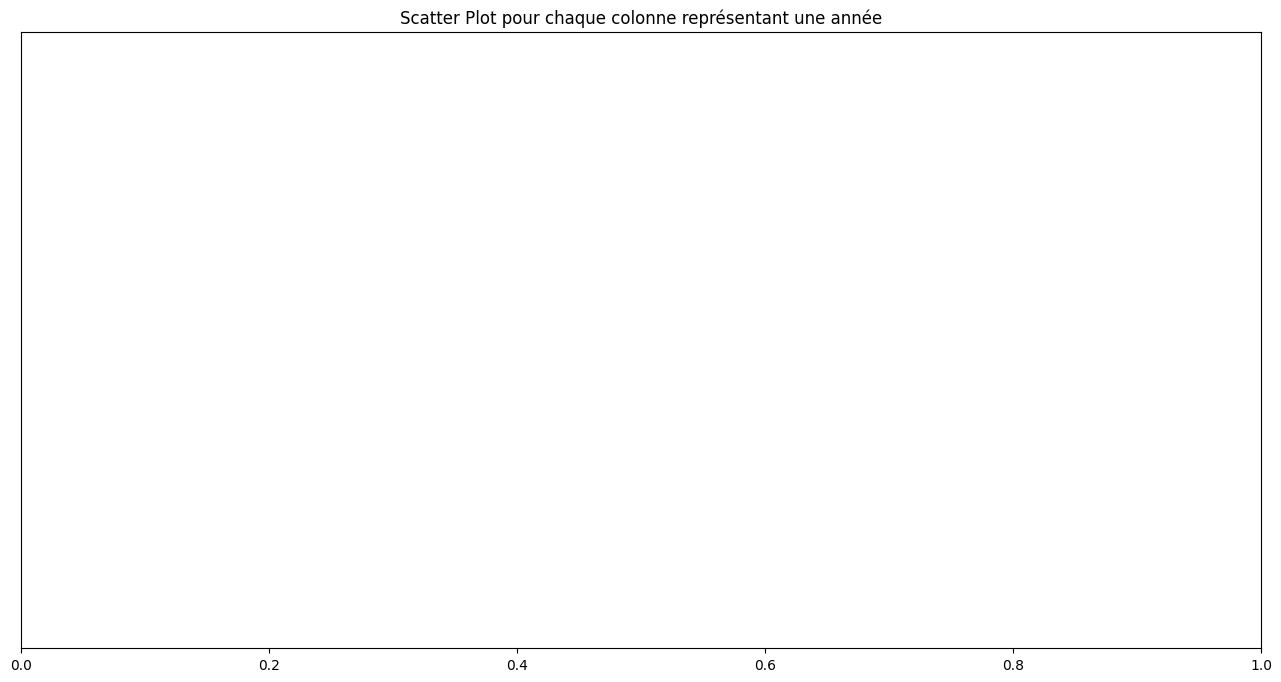

In [15]:
"""Check des données aberrantes avec Scatter Plot"""
columns_to_convert = df.columns[6:59]
df[columns_to_convert] = df[columns_to_convert].apply(pd.to_numeric, errors='coerce')
columns_to_plot = df.columns[6:59]

plt.figure(figsize=(16, 8))

for col in columns_to_plot:
    sns.scatterplot(data=df, x=col, y=columns_to_plot.get_loc(col))

plt.yticks(range(1, len(columns_to_plot) + 1), columns_to_plot)
plt.title("Scatter Plot pour chaque colonne représentant une année")
plt.show()

### - Représentation graphique des valeurs manquantes:

- Matrice:

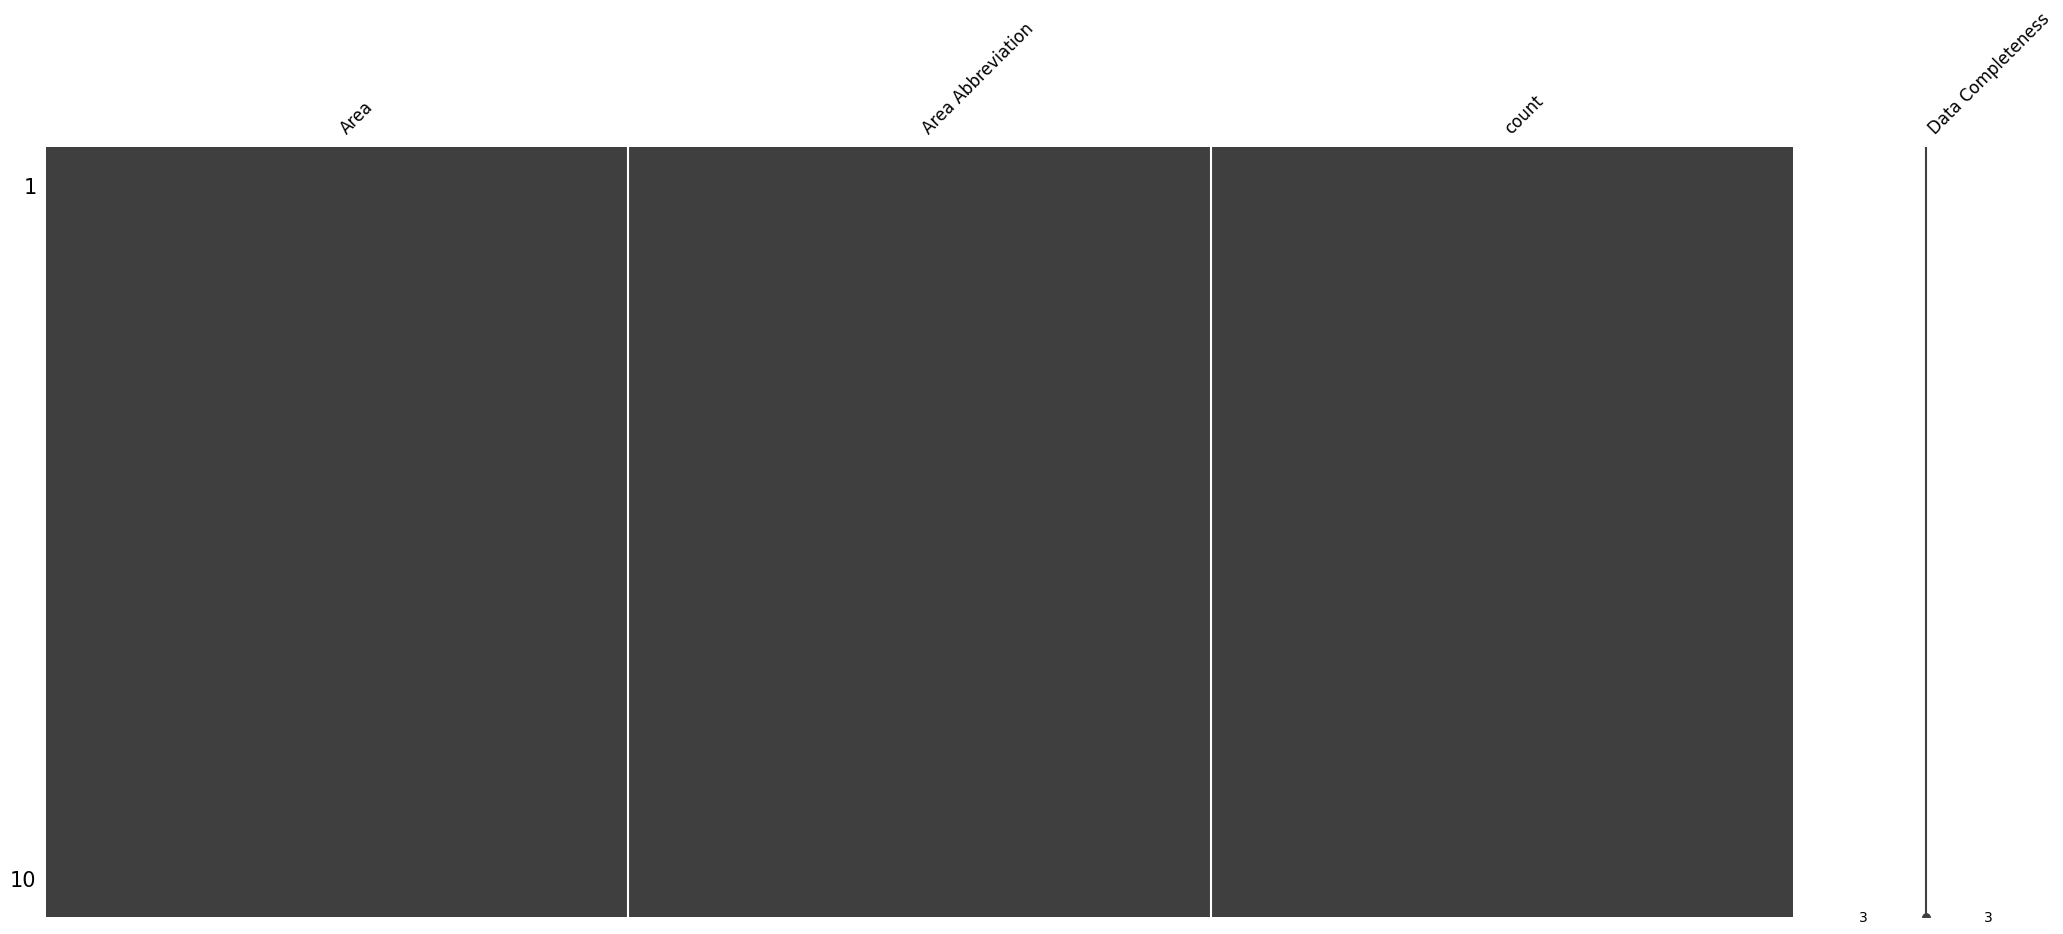

In [16]:
msno.matrix(df, labels=True, fontsize=12, sparkline=True)
plt.show()

On observe un pattern pour les données manquantes dans l'invervalle comprennant les colonnes 1961 - 1991.

- Histogramme:

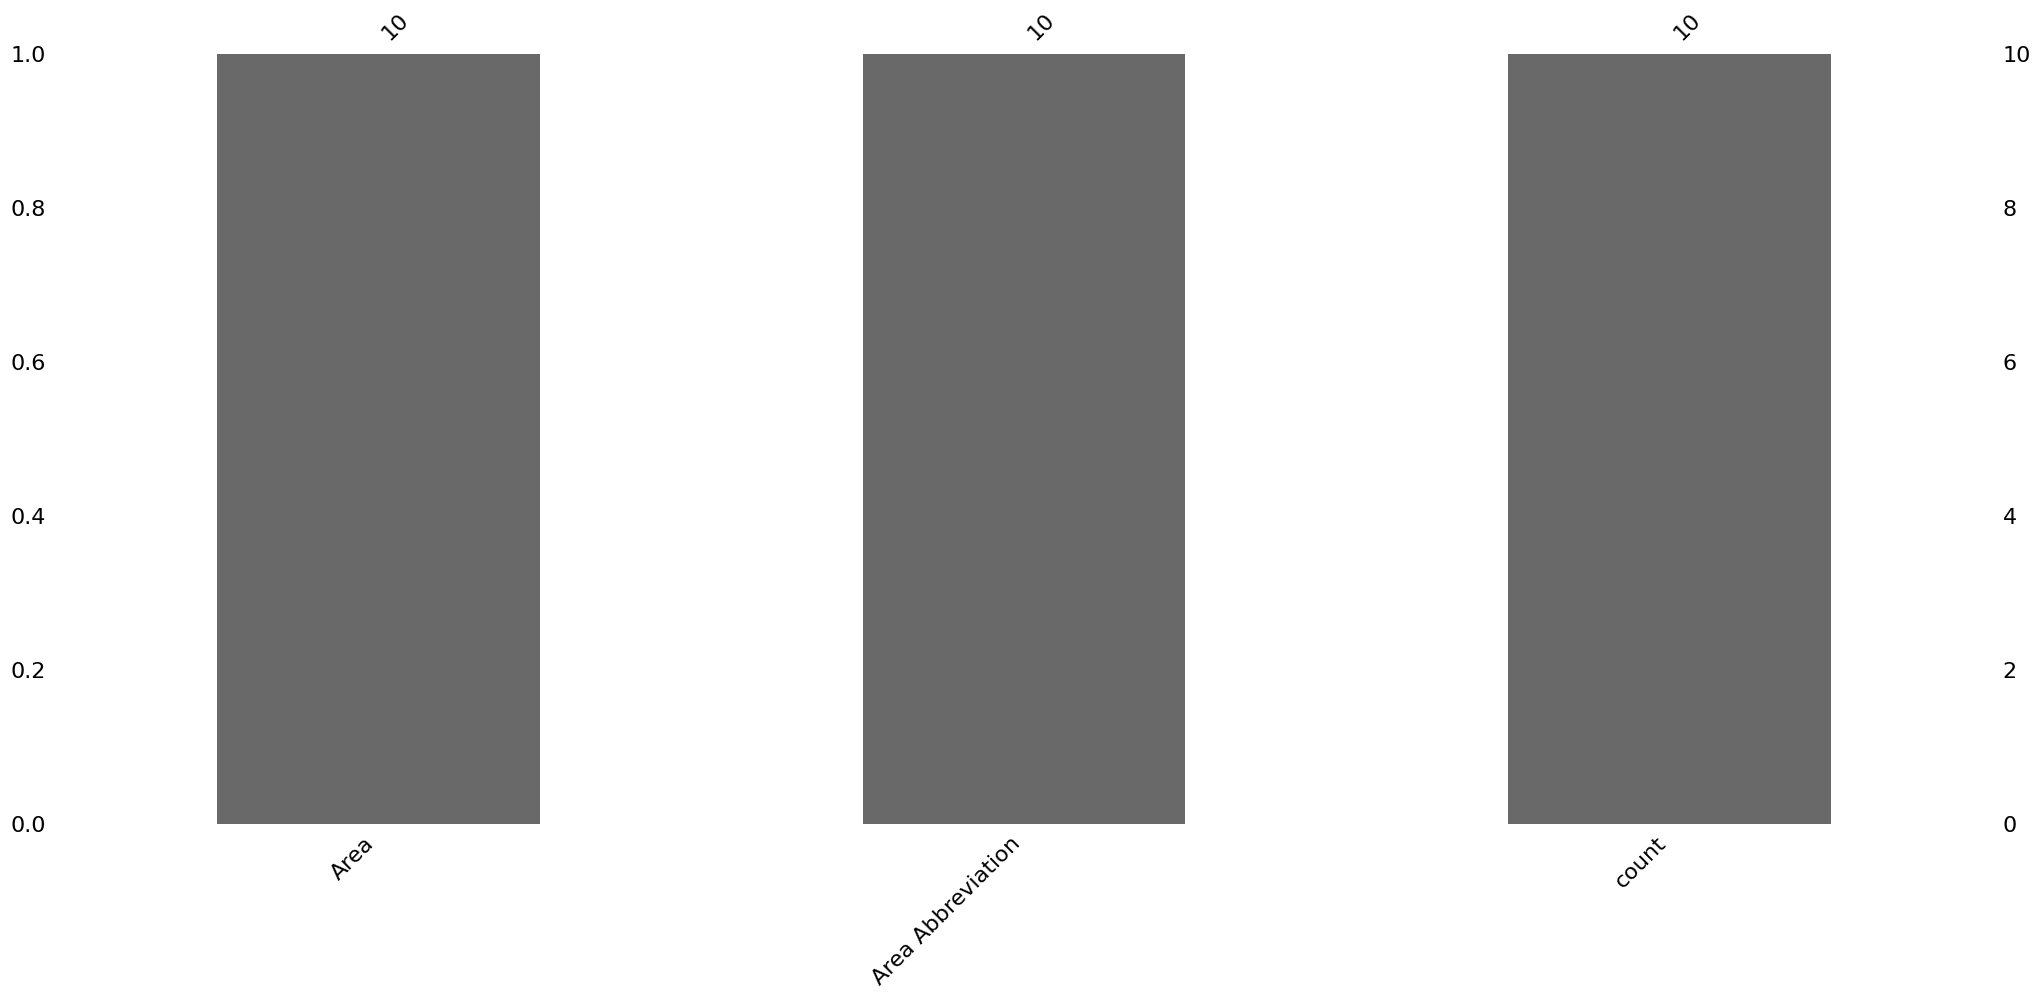

In [17]:
msno.bar(df)
plt.show()

Représentation simple des données manquantes sous forme d'histogramme.

C:\Users\m.geley\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\matrix.py:309: UserWarning:

Attempting to set identical low and high xlims makes transformation singular; automatically expanding.

C:\Users\m.geley\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\matrix.py:309: UserWarning:

Attempting to set identical low and high ylims makes transformation singular; automatically expanding.



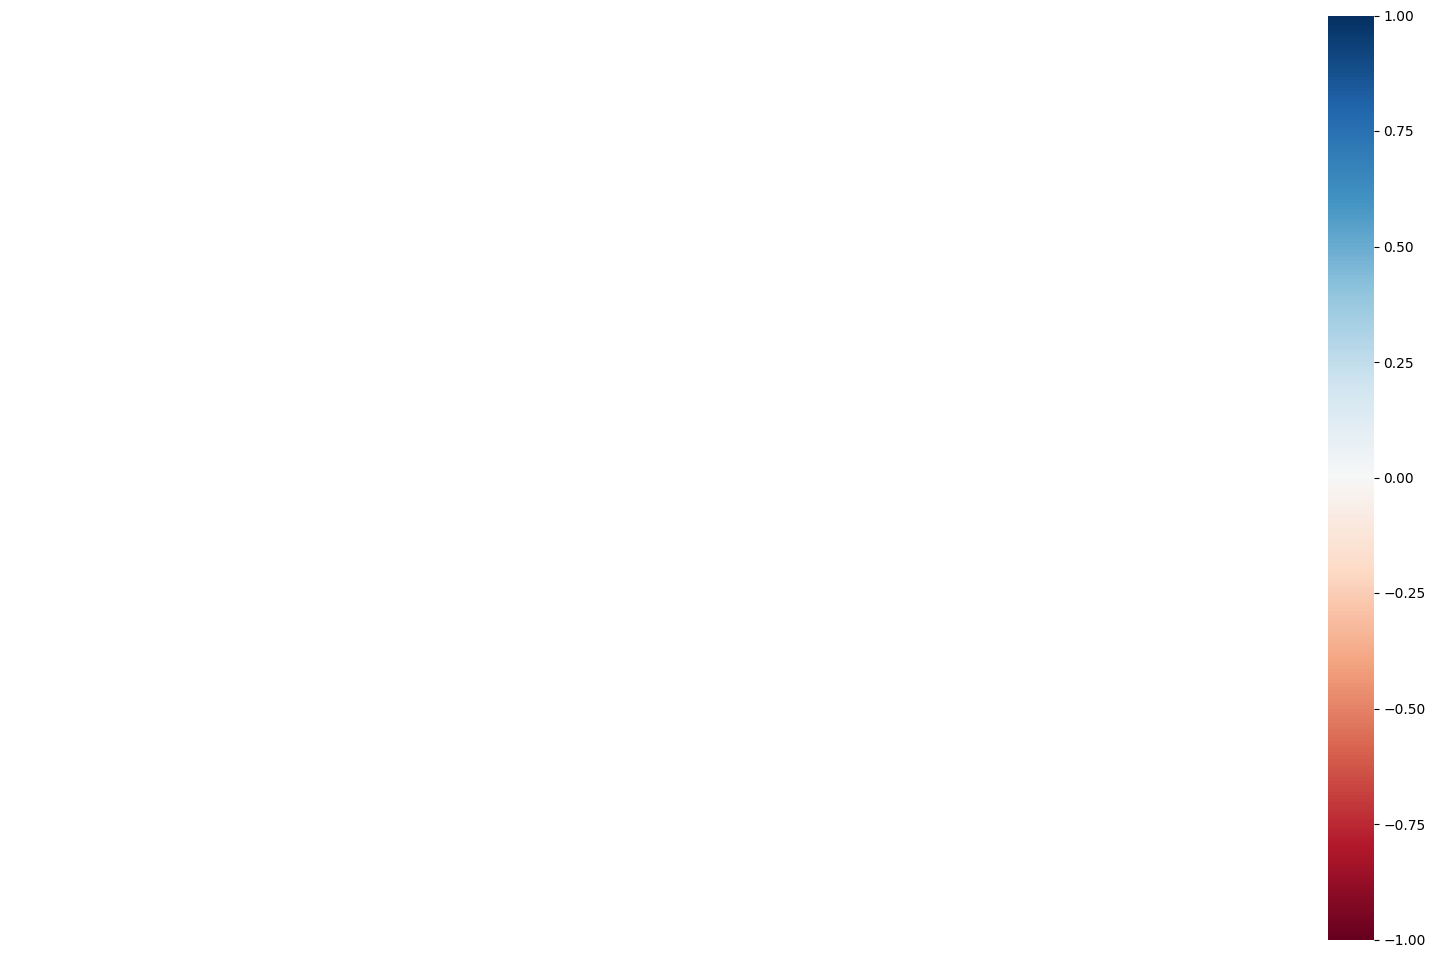

In [18]:
msno.heatmap(df)
plt.show()

Corrélation des données manquantes entre 2 colonnes.   
Signification:
- Valeur proche de -1 : Si une variable apparaît alors la seconde est probablement manquante
- Valeur proche de 0 : Il n'y a pas de dépendance entre l'occurence de données manquantes entre 2 variables
- Valeur proche de 1 : Si une variable apparaît alors la seconde est probablement présente

- Dendrogramme

C:\Users\m.geley\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\cluster\hierarchy.py:2820: UserWarning:

Attempting to set identical low and high ylims makes transformation singular; automatically expanding.



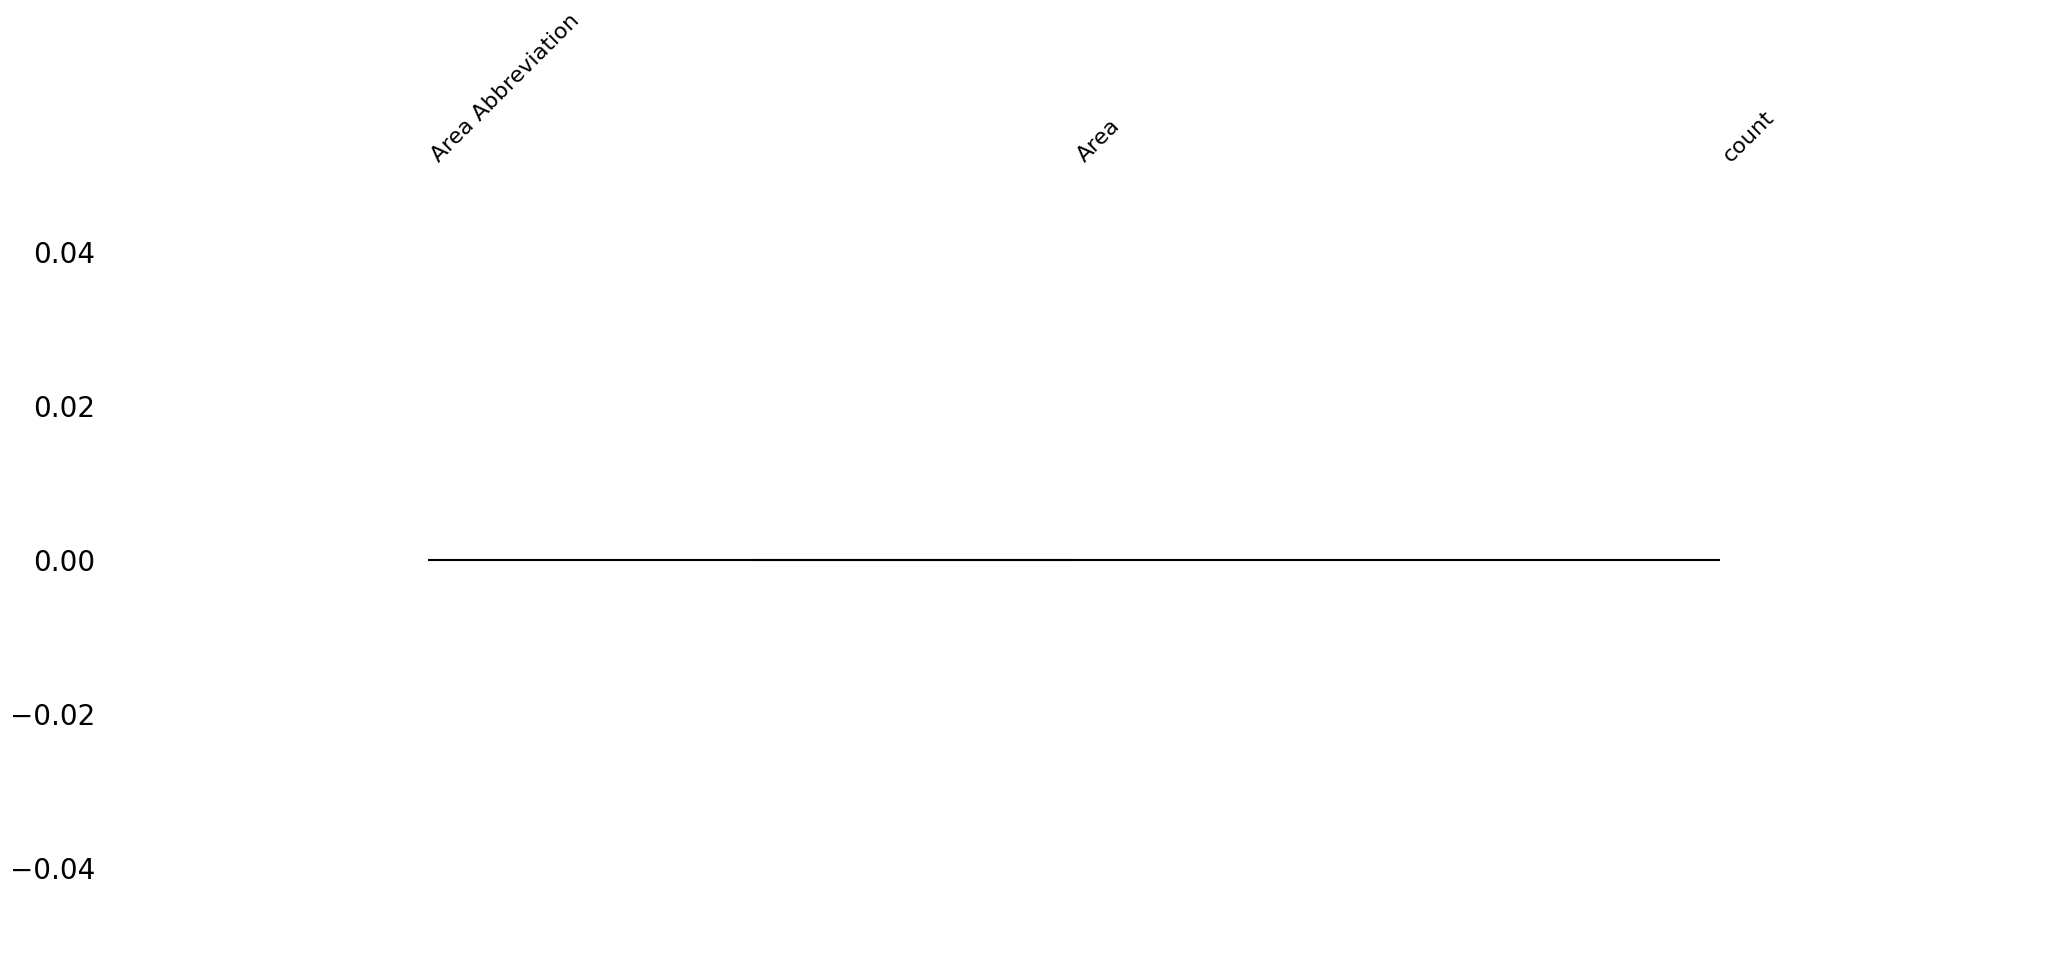

In [19]:
msno.dendrogram(df)
plt.show()

Diagramme en arborescence, on y voit les relations entre les ensembles de données similaires.

## Type de données par colonne:
- Qualitative,
- Quantitative discrète,
- Quantitative continue.

In [20]:
Qualitative = []
Discrete = []
Continue = []
for i in range(len(df.dtypes)):
    if df.dtypes.iloc[i] == 'object':
        Qualitative.append(df.columns[i])
    if df.dtypes.iloc[i] == 'int64':
        Discrete.append(df.columns[i])
    if df.dtypes.iloc[i] == 'float64':
        Continue.append(df.columns[i])

print("Qualitative: ", Qualitative)
print("Discrete: ", Discrete)
print("Continue: ", Continue)

Qualitative:  ['Area', 'Area Abbreviation']
Discrete:  ['count']
Continue:  []


Chaque donnée qualitative est de nature Nominal, car elle ne permettent pas de ranger les données dans un ordre précis.

Les données discrètes sont des valeurs fixes définient, elle n'appartiennent pas à un intervalle de valeurs.

Les données continues sont des valeurs qui peuvent prendre n'importe quelle valeur dans un intervalle donné, elles servent de mesure d'unités de nourriture produite ou consommé dans notre cas.

## Classement des pays plus gros producteurs/consommateurs par produits:
- Production destiné à l'Homme = Food,
- Production destiné au bétail = Feed.

In [21]:
Year = []
Food = df.loc[df['Element'] == 'Food']
for i in range(1961, 2014):
    Year.append(str(i))
Food = Food[Year]
Food = Food.sum()
Food.plot(kind='bar', figsize=(20, 10), title="Worldwide food production over time.", color='blue')
plt.show()

KeyError: 'Element'

In [ ]:
Feed = df.loc[df['Element'] == 'Feed']
Feed = Feed[Year]
Feed = Feed.sum()
Feed.plot(kind='bar', figsize=(20, 10), title="Worldwide feed production over time.", color='green')
plt.show()

### Pivot des données sur les années avec la méthode melt

In [ ]:
df = pd.melt(df, id_vars=['Area', 'Item', 'Element'], value_vars=Year)
df = df.rename(columns={'variable': 'Year', 'value': 'Poduction'})
df.head(10)

### Courbe des tendances de production pour la France

In [ ]:
France = df.loc[df['Area'] == 'France']
France = France.loc[France['Element'] == 'Food']
France = France.loc[France['Item'] == 'Wheat and products']
France = France.drop(['Area', 'Item', 'Element'], axis=1)
France = France.set_index('Year')
France.plot(figsize=(20, 10), label='France')
plt.show()

### Courbe des tendances de production pour l'Afganistan

In [ ]:
afghanistan_feed_data = df[(df['Area'] == 'Afghanistan') & (df['Element'] == 'Feed')]
id_columns = afghanistan_feed_data.columns[:10]

afghanistan_feed_data = pd.melt(afghanistan_feed_data, id_vars=id_columns, var_name='Year', value_name='Value')

afghanistan_feed_data['Year'] = afghanistan_feed_data['Year'].str.extract('(\d+)').astype(float)

feed_data = afghanistan_feed_data[afghanistan_feed_data['Element'] == 'Feed']

summary_by_year = feed_data.groupby('Year')['Value'].sum()

df_plot = pd.DataFrame({'Year': summary_by_year.index, 'Total Feed': summary_by_year.values})

fig = px.line(df_plot, x='Year', y='Total Feed', title='Évolution de Feed en Afghanistan au fil des années')
# requires pip install nbformat
fig.show()